# Task 1: Data Exploration and Preprocessing

Q1. Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

Q2. Handle missing values as per the best practices (imputation, removal, etc.).

Q3. Apply scaling techniques to numerical features:

    a. Standard Scaling
    b. Min-Max Scaling

Q4. Discuss the scenarios where each scaling technique is preferred and why.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ppscore as pps
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest


import warnings
warnings.filterwarnings('ignore')

# Load the dataset into a DataFrame or equivalent data structure.
adult_df= pd.read_csv('adult_with_headers.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
adult_df.head()

First 5 rows of the dataset:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### Basic Data Exploration

In [2]:
# Get summary statistics
print("\nSummary statistics:")
adult_df.describe()


Summary statistics:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [3]:
# Get number of rows and columns

print("\nNumber of rows and columns:")
adult_df.shape


Number of rows and columns:


(32561, 15)

In [4]:
# Get column names

print("\nColumn names:")
adult_df.columns


Column names:


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [5]:
# Get data types of columns

print("\nData types of columns:")
adult_df.dtypes


Data types of columns:


age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

##### Missing Values

In [6]:
# Check for any missing values

print("\nMissing values:")
print(adult_df.isnull().sum())


Missing values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


##### Scaling

In [7]:
# Select numerical columns for scaling
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [8]:
# Apply Standard Scaling

# Initialize StandardScaler
scaler_standard = StandardScaler()

# Fit and transform the numerical columns
standard_scaled_df = adult_df.copy()
standard_scaled_df[numerical_cols] = scaler_standard.fit_transform(adult_df[numerical_cols])

# Display scaled numerical columns
print("Standard Scaled Numerical Columns:")
standard_scaled_df[numerical_cols].head()

Standard Scaled Numerical Columns:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [9]:
# Apply Min-Max Scaling

# Initialize MinMaxScaler
scaler_minmax = MinMaxScaler()

# Fit and transform the numerical columns
minmax_scaled_df = adult_df.copy()
minmax_scaled_df[numerical_cols] = scaler_minmax.fit_transform(adult_df[numerical_cols])

# Display scaled numerical columns
print("\nMin-Max Scaled Numerical Columns:")
minmax_scaled_df[numerical_cols].head()


Min-Max Scaled Numerical Columns:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


#### Using Standard Scaling (Standardization)

1. Preference: Standard Scaling is preferred when the distribution of the numerical feature is Gaussian (normal distribution).
2. Why: It scales the feature such that it has a mean of 0 and a standard deviation of 1. This makes it suitable for algorithms 
    that assume normally distributed data, such as linear regression, logistic regression, and algorithms that use distance 
    measures (e.g., K-Nearest Neighbors, Support Vector Machines with RBF kernel).

Advantages:

1. Helps in faster convergence during model training.
2. Does not bound values to a specific range, which can be useful when dealing with outliers.

For Example: If we have features like age or income that are normally distributed, Standard Scaling would be appropriate to ensure all features contribute equally to the model.

#### Using Min-Max Scaling (Normalization)

1. Preference: Min-Max Scaling is preferred when the distribution of the numerical feature is not Gaussian and when you want to 
    preserve the original distribution of the feature.
2. Why: It scales the feature to a fixed range, typically [0, 1] by default, but it can be adjusted to any desired range. This 
    makes it suitable for algorithms that require features to be on a similar scale, such as neural networks, algorithms that 
    use gradient descent optimization, and algorithms that use distance measures where distances are meaningful only within the 
    same range for all features.

Advantages:

1. Helps interpretability since the transformed data will be within a fixed range.
2. Can be useful when input features need to be on a similar scale for algorithm performance and convergence.

For Example: If we have features like pixel intensities in an image or features that have a specific bounded range (e.g., 0 to 100), Min-Max Scaling would be appropriate to bring them into a common scale.

#### Considerations:

1. Outliers: Standard Scaling is sensitive to outliers since it is based on mean and standard deviation. Min-Max Scaling, on the 
    other hand, can handle outliers better because it scales values to a bounded interval.

2. Algorithm Requirements: We always need to consider the requirements of the specific algorithm that we are using. Some 
    algorithms might perform better with one type of scaling over the other.

3. Feature Distribution: Understanding the distribution of our features is crucial in deciding which scaling technique to apply. 
    Tools like histograms or density plots can help visualize feature distributions.

# Task 2: Encoding Techniques

Q1. Apply One-Hot Encoding to categorical variables with less than 5 categories.

Q2. Use Label Encoding for categorical variables with more than 5 categories.

Q3. Discuss the pros and cons of One-Hot Encoding and Label Encoding.

In [10]:
# Identify categorical variables with less than 5 unique categories
categorical_cols = [col for col in adult_df.columns if adult_df[col].dtype == 'object' and adult_df[col].nunique() < 5]
categorical_cols

['sex', 'income']

In [11]:
# Apply One-Hot Encoding to identified categorical variables
onehot_encoded_df = pd.get_dummies(adult_df, columns=categorical_cols)

# Display the encoded DataFrame
print("\nEncoded DataFrame after One-Hot Encoding:")
onehot_encoded_df.head()


Encoded DataFrame after One-Hot Encoding:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,False,True,True,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,False,True,True,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,False,True,True,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,False,True,True,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,True,False,True,False


In [12]:
# Apply Label Encoding to identified categorical variables
label_encoded_df=adult_df.copy()

label_encoder = LabelEncoder()
for col in categorical_cols:
    label_encoded_df[col] = label_encoder.fit_transform(adult_df[col])

# Display the encoded DataFrame
print("\nEncoded DataFrame after Label Encoding:")
label_encoded_df.head()


Encoded DataFrame after Label Encoding:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


#### Using One-Hot Encoding

Pros:

1. Preserves Information: One-Hot Encoding preserves all the information about the categorical variable since each category is 
transformed into a separate binary feature.
2. Interpretability: The resulting encoded features are easily interpretable because each category becomes a separate binary feature with clear semantics.
3. No Assumptions about Ordinality: One-Hot Encoding does not assume any ordinal relationship among categories, making it suitable for categorical variables without an inherent order.
4. Works Well with Most Algorithms: Many machine learning algorithms perform well with One-Hot Encoding, especially those that do not assume any ordinal relationship between categories.

Cons:

1. Increases Dimensionality: One-Hot Encoding increases the dimensionality of the dataset, especially when dealing with categorical variables with many unique categories. This can lead to the curse of dimensionality and increased computational requirements.
2. Collinearity Issues: The encoded features can be highly correlated (collinear) because only one feature can be active (1) for each observation. This can cause problems for algorithms that assume feature independence.
3. Memory and Computational Costs: One-Hot Encoding can significantly increase memory usage and computational costs, especially for large datasets with many categorical variables.

#### Using Label Encoding

Pros:

1. Reduces Dimensionality: Label Encoding reduces the number of dimensions in the dataset by transforming categorical variables into ordinal integers. This can be beneficial when dealing with categorical variables with many categories.
2. Preserves Order: Label Encoding preserves the ordinal relationship among categories if such an order exists (e.g., "low", "medium", "high").
3. Simplifies Algorithms: Some algorithms (especially tree-based algorithms) can perform better with Label Encoding because they can capture ordinal relationships naturally.
4. Less Memory Intensive: Label Encoding requires less memory compared to One-Hot Encoding, as it transforms categories into a single numerical column.

Cons:
1. May Introduce Unexpected Relationships: Label Encoding may introduce an ordinal relationship among categories where none exists, which can be misleading to the algorithm.
2. Not Suitable for Non-Ordinal Categories: Label Encoding is not suitable for categorical variables where no ordinal relationship exists. It may lead the algorithm to incorrectly interpret the data.
3. Potential Bias: Algorithms that rely on numerical operations (e.g., distance calculations) may treat encoded categories as continuous values, potentially introducing bias.

#### Choosing Between One-Hot Encoding and Label Encoding

Use One-Hot Encoding:

1. When there is no inherent order among categories.
2. When dealing with categorical variables with relatively few unique categories (< 10).
3. When the algorithm can handle high-dimensional data and collinearity issues.

Use Label Encoding:

1. When there is a clear ordinal relationship among categories.
2. When dealing with categorical variables with many unique categories (> 10).
3. When working with algorithms that naturally interpret ordinal data (e.g., decision trees).
4. In practice, it's common to use a combination of both encoding techniques depending on the nature of the categorical variables and the requirements of the machine learning algorithm. Preprocessing steps should be chosen carefully to ensure they align with the characteristics of the data and the assumptions of the chosen algorithm.

# Task 3: Feature Engineering

Q1. Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

Q2. Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

#### New Feature 1 - Age Group Binning

Rationale: Age can significantly impact income levels. Instead of using age as a continuous variable, we can create bins or categories that group individuals based on age ranges. This can capture nonlinear relationships between age and income.

New Feature: Age Group - Create age groups such as "Young Adult," "Middle-Aged," and "Senior" based on predefined age ranges (e.g., 18-30, 31-50, 51+).

In [13]:
# Define age bins and labels
age_bins = [0, 30, 50, float('inf')]
age_labels = ['Young Adult', 'Middle-Aged', 'Senior']

# Create Age Group feature
adult_df['age_group'] = pd.cut(adult_df['age'], bins=age_bins, labels=age_labels, right=False)
adult_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Middle-Aged
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Senior
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Middle-Aged
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Senior
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Young Adult
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Middle-Aged
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Senior
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,Young Adult


#### New Feature 2 - Education Level Numerical Encoding

Rationale: The dataset contains a categorical feature education which represents the highest level of education achieved by individuals. While Label Encoding can be used to transform these categories into numerical values, we can further enhance this by assigning numerical values that reflect the hierarchical nature of education levels.

New Feature: Education Level Numerical Encoding - Assigning numerical values based on the hierarchical order of education levels can provide more meaningful information to the model. For example, higher numerical values can represent higher levels of education.

In [14]:
# Handle Extra Whitespace
adult_df['education'] = adult_df['education'].str.strip()

# Check Unique Values in 'education' Column
unique_educations = adult_df['education'].unique()
print(unique_educations)

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


In [15]:
# Create a mapping dictionary for education levels
education_mapping = {
    'Preschool': 1,
    '1st-4th': 2,
    '5th-6th': 3,
    '7th-8th': 4,
    '9th': 5,
    '10th': 6,
    '11th': 7,
    '12th': 8,
    'HS-grad': 9,
    'Some-college': 10,
    'Prof-school':11,
    'Assoc-acdm': 12,
    'Assoc-voc': 13,
    'Bachelors': 14,
    'Masters': 15,
    'Doctorate': 16
}

# Apply the mapping to create the new feature
adult_df['education_level_encoded'] = adult_df['education'].map(education_mapping)
adult_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,education_level_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Middle-Aged,14
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Senior,14
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Middle-Aged,9
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Senior,7
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Young Adult,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Young Adult,12
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Middle-Aged,9
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Senior,9
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,Young Adult,9


#### Applying Log Transformation to a skewed numerical column

In [16]:
# Calculate skewness for all numerical columns in dataset

skewness = adult_df[numerical_cols].skew()

# Filter columns with skewness > 1 (highly skewed)
skewed_columns = skewness[abs(skewness) > 1].index
skewed_columns

Index(['fnlwgt', 'capital_gain', 'capital_loss'], dtype='object')

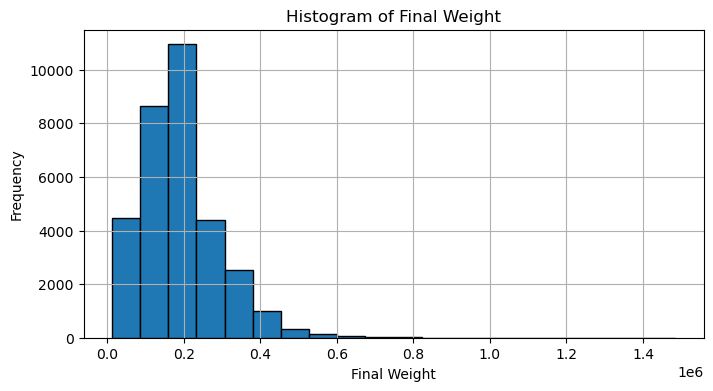

In [17]:
# Visualizing skewness of 'fnlwgt' column

# Plot histogram to visualize the distribution
plt.figure(figsize=(8, 4))
plt.hist(adult_df['fnlwgt'], bins=20, edgecolor='black')
plt.title('Histogram of Final Weight')
plt.xlabel('Final Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

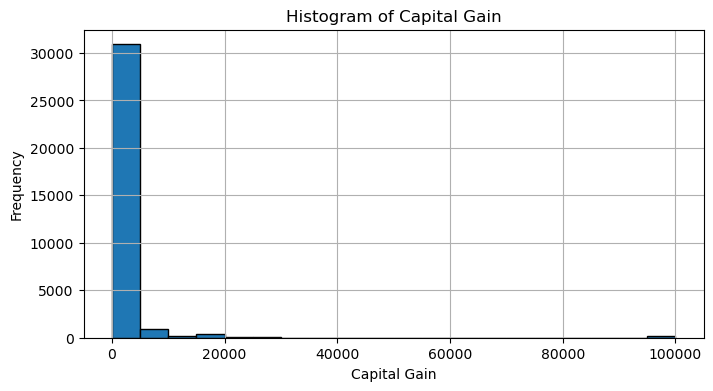

In [18]:
# Visualizing skewness of 'capital_gain' column

# Plot histogram to visualize the distribution
plt.figure(figsize=(8, 4))
plt.hist(adult_df['capital_gain'], bins=20, edgecolor='black')
plt.title('Histogram of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

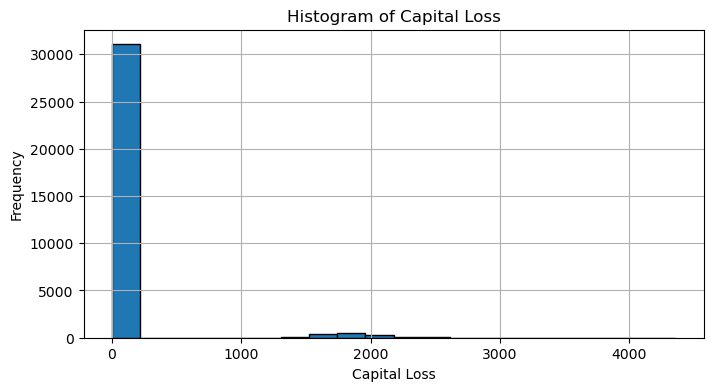

In [19]:
# Visualizing skewness of 'capital_loss' column

# Plot histogram to visualize the distribution
plt.figure(figsize=(8, 4))
plt.hist(adult_df['capital_loss'], bins=20, edgecolor='black')
plt.title('Histogram of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Log transformation is typically applied to features that exhibit high skewness. Skewness indicates that the data distribution is asymmetric, with a tail towards one direction (usually towards higher values). The effectiveness of log transformation depends on the degree of skewness present in the feature. Hence, we are choosing 'capital_gain' since it shows higher skewness compared to 'fnlwgt' or 'capital_loss'.

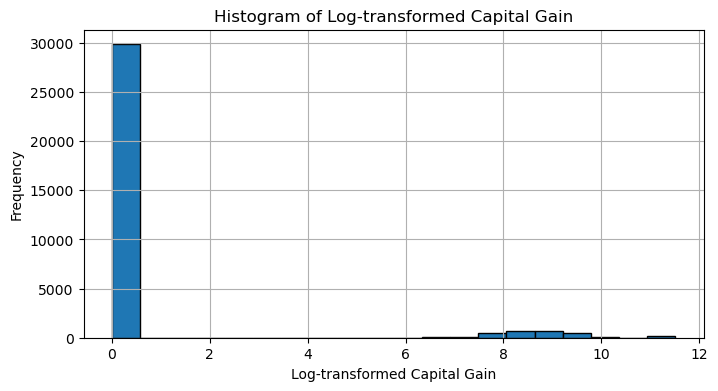

In [20]:
# Apply log transformation to 'capital_loss
adult_df['log_capital_gain'] = np.log1p(adult_df['capital_gain'])  # Using np.log1p to avoid log(0)

# Plot histogram of log-transformed capital_gain
plt.figure(figsize=(8, 4))
plt.hist(adult_df['log_capital_gain'], bins=20, edgecolor='black')
plt.title('Histogram of Log-transformed Capital Gain')
plt.xlabel('Log-transformed Capital Gain')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Task 4: Feature Selection

Q1. Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

Q2. Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [21]:
# Isolation Forest for outlier detection

isolation_forest = IsolationForest(contamination='auto', random_state=0)
outlier_labels = isolation_forest.fit_predict(adult_df[numerical_cols])

# Identify outliers (outlier labels are -1 for outliers)
outliers = adult_df[outlier_labels == -1]
outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,education_level_encoded,log_capital_gain
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,Middle-Aged,15,9.552866
23,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States,<=50K,Middle-Aged,7,0.000000
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K,Middle-Aged,14,0.000000
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K,Middle-Aged,11,0.000000
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K,Senior,10,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32525,81,?,120478,Assoc-voc,11,Divorced,?,Unmarried,White,Female,0,0,1,?,<=50K,Senior,13,0.000000
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,Middle-Aged,14,0.000000
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,Senior,16,0.000000
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K,Senior,11,6.991177


In [22]:
# Remove outliers from the dataset
cleaned_df = adult_df[outlier_labels == 1]
cleaned_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,education_level_encoded,log_capital_gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Middle-Aged,14,7.684784
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Senior,14,0.000000
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Middle-Aged,9,0.000000
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Senior,7,0.000000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Young Adult,14,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,Young Adult,10,0.000000
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Young Adult,12,0.000000
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Middle-Aged,9,0.000000
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Senior,9,0.000000


#### Effects of Outliers on Model Performance:

Outliers can significantly impact model performance and the results of data analysis in several ways:

1. Skewed Statistics: Outliers can skew statistical measures such as mean, standard deviation, and correlation, making them less representative of the majority of the data.
2. Model Assumptions: Many machine learning algorithms assume that the data is normally distributed or follows a certain pattern. Outliers violate these assumptions and can lead to biased models.
3. Increased Variance: Outliers can increase the variance of the model, leading to overfitting. This happens because the model tries to fit to the outliers rather than the majority of the data.
4. Loss of Efficiency: Outliers can reduce the efficiency and accuracy of models by affecting the decision boundaries or clustering algorithms.
5. Incorrect Insights: Outliers can lead to incorrect interpretations and insights from the data, as they may represent rare events or errors rather than meaningful patterns.

In [23]:
# PPS Matrix

# Filter numeric columns
numeric_cols = adult_df.select_dtypes(include=['int', 'float']).columns

# Calculate PPS Matrix
pps_matrix = pps.matrix(adult_df[numeric_cols])

pd.options.display.max_rows = 100;

pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,fnlwgt,0.000000,regression,True,mean absolute error,75872.186200,77535.141544,DecisionTreeRegressor()
2,age,education_num,0.000000,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
3,age,capital_gain,0.000000,regression,True,mean absolute error,1093.884000,2003.391960,DecisionTreeRegressor()
4,age,capital_loss,0.000000,regression,True,mean absolute error,94.942600,177.745741,DecisionTreeRegressor()
5,age,hours_per_week,0.000000,regression,True,mean absolute error,7.656400,8.129102,DecisionTreeRegressor()
6,age,education_level_encoded,0.000000,regression,True,mean absolute error,2.066600,2.163077,DecisionTreeRegressor()
7,age,log_capital_gain,0.000000,regression,True,mean absolute error,0.714858,1.298603,DecisionTreeRegressor()
8,fnlwgt,age,0.000000,regression,True,mean absolute error,11.205800,14.159450,DecisionTreeRegressor()
9,fnlwgt,fnlwgt,1.000000,predict_itself,True,None,0.000000,1.000000,None


In [24]:
pd.reset_option('display.max_rows')

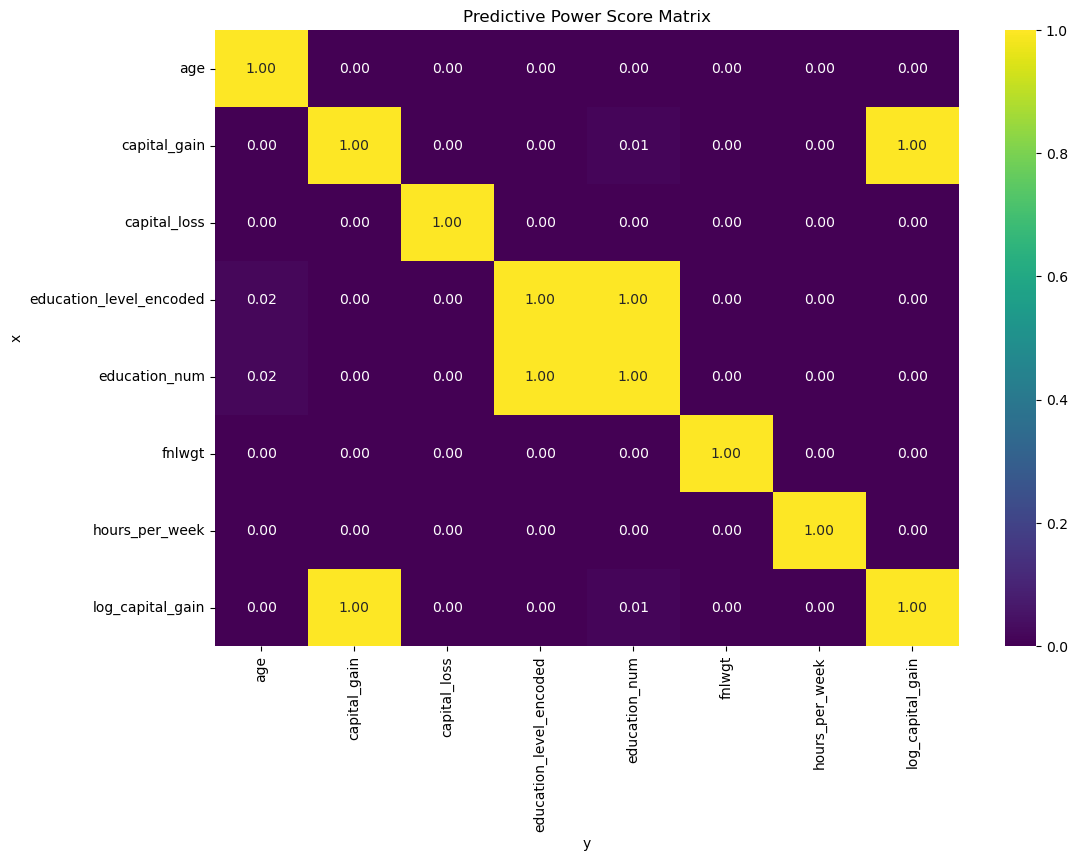

In [25]:
# Visualize PPS matrix

# Reshape the PPS matrix into a pivot table for visualization
pps_matrix_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pps_matrix_pivot, annot=True, cmap='viridis', fmt='.2f')
plt.title('Predictive Power Score Matrix')
plt.show()

In [26]:
# Correlation Matrix

# Select only numeric columns
numeric_cols = adult_df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()
correlation_matrix

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,education_level_encoded,log_capital_gain
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.030600,0.124183
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.043063,-0.004414
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.962735,0.129135
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.087163,0.564520
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.070537,-0.064840
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.138218,0.083821
education_level_encoded,0.030600,-0.043063,0.962735,0.087163,0.070537,0.138218,1.000000,0.112834
log_capital_gain,0.124183,-0.004414,0.129135,0.564520,-0.064840,0.083821,0.112834,1.000000


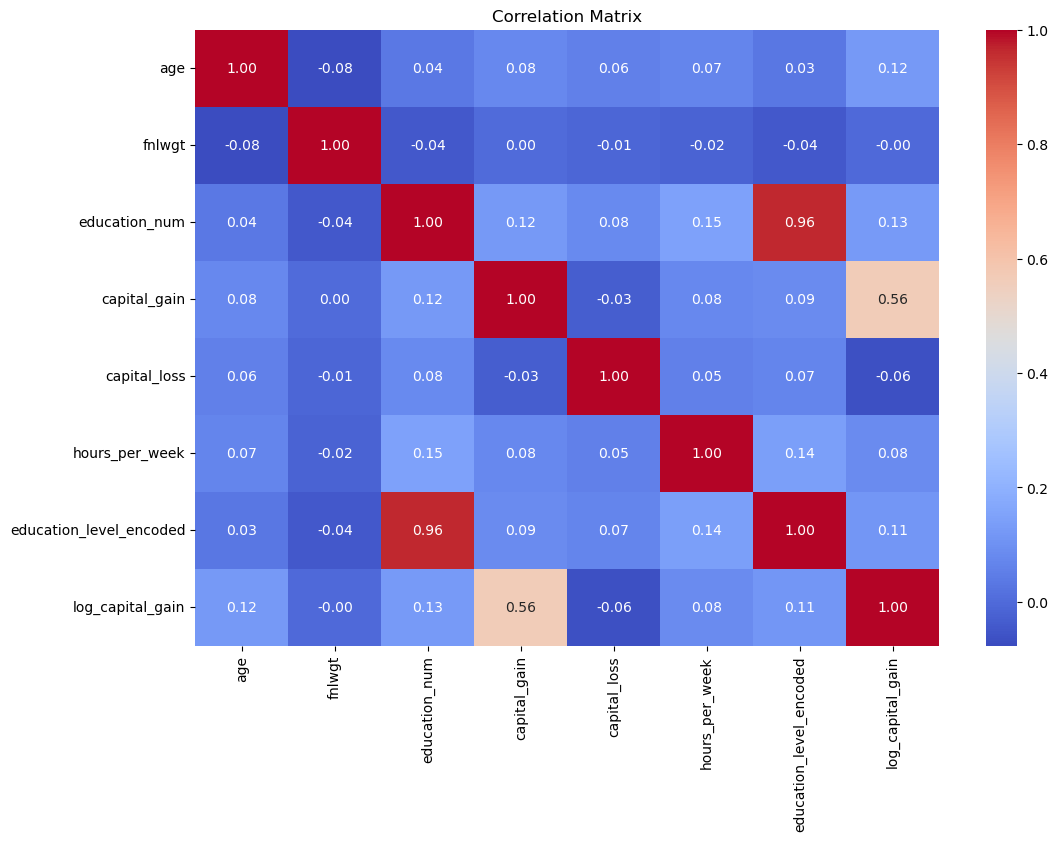

In [27]:
# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Comparison between PPS Matrix & Correlation Matrix

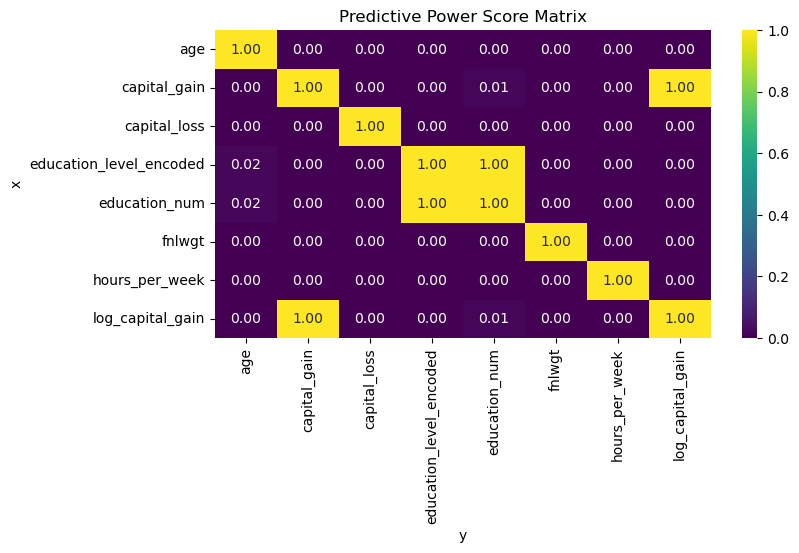

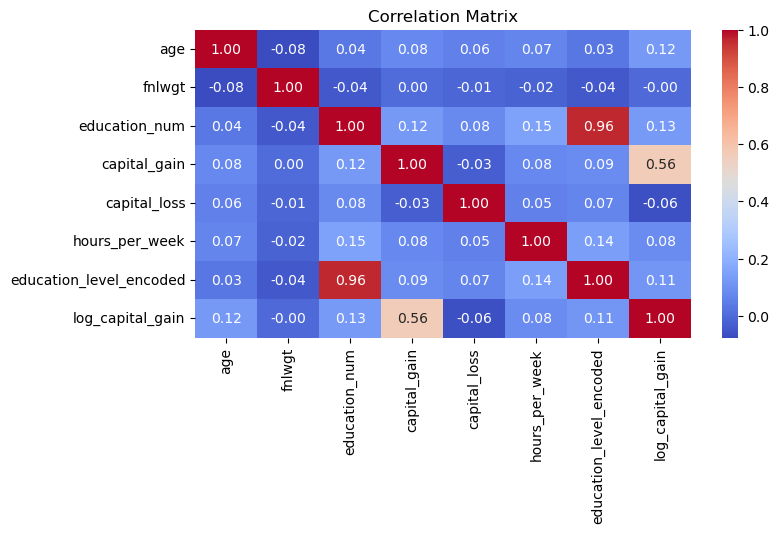

In [28]:
# Visual Comparison 

# Visualize PPS matrix
plt.figure(figsize=(8, 4))
sns.heatmap(pps_matrix_pivot, annot=True, cmap='viridis', fmt='.2f')
plt.title('Predictive Power Score Matrix')
plt.show()

# Visualize Correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Key Findings:

##### PPS Matrix Analysis

1. PPS Score (ppscore): The PPS matrix provides a measure of how well one variable can predict another. ppscore = 1.0 indicates perfect prediction, either because the variable predicts itself or due to a strong predictive model.
2. Key Observations from PPS Matrix:

    1. Self-Prediction (ppscore = 1.0): Variables like 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'education_level_encoded', and 'log_capital_gain' all predict themselves perfectly (ppscore = 1.0).
    2. Non-Trivial Predictions (ppscore < 1.0): For instance, 'log_capital_gain' predicts 'capital_gain' with a very high score (ppscore = 0.996), indicating a strong predictive relationship.
    3. Low Prediction (ppscore ≈ 0): Variables like age predicting fnlwgt, education_num, capital_gain, and capital_loss with ppscore ≈ 0 indicate that these pairs do not have strong predictive relationships, consistent with their low correlation coefficients in the correlation matrix.
 

##### Correlation Matrix Analysis

1. Correlation Coefficients: The correlation matrix measures linear relationships between variables. Values range from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear correlation.
2. Key Observations from Correlation Matrix: 
    1. Variables like 'education_num' and 'education_level_encoded' have a very high correlation (correlation ≈ 0.962), indicating a strong linear relationship. 
    2. 'log_capital_gain' and 'capital_gain' also show a moderately high correlation (correlation = 0.564), suggesting a linear relationship.


##### Comparison of PPS Matrix with Correlation Matrix

1. Different Perspectives: Predictive Power vs. Linear Dependence - The PPS matrix captures both linear and non-linear predictive relationships, which might not be fully captured by the correlation matrix. Correlation matrix focuses solely on linear relationships and doesn't account for non-linear associations or self-predictive power.
2. Consistency and Differences:
    1. Consistency: Both matrices show high self-prediction (ppscore = 1.0 and diagonal values of 1 in correlation matrix). Variables that are strongly correlated in the correlation matrix generally have high PPS scores (e.g., education_num and education_level_encoded).
    2. Differences: PPS matrix provides additional insights into predictive relationships that are not strictly linear but still significant (e.g., 'log_capital_gain' predicting 'capital_gain'). Correlation matrix might overlook such non-linear associations captured by the PPS matrix.
3. Utility in Analysis:
    1. Feature Selection: PPS can aid in feature selection by identifying variables that are predictive but not necessarily highly correlated.
    2. Model Building: Correlation matrix helps in understanding which variables might be redundant due to high correlations, while PPS highlights variables that might be predictive regardless of linear relationships.